# Business Case

● Patients with liver disease have been continuously increasing due to excessive consumption of alcohol, inhalation of harmful gases, intake of contaminated food, pickles, and certain drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce the burden on doctors.  

● This dataset contains **416 liver patient records** and **167 non-liver patient records**, collected from the North East region of Andhra Pradesh, India. The **"Target"** column is a class label used to distinguish between liver patients (disease) and non-liver patients (no disease). The dataset also includes **441 male patient records** and **142 female patient records**.  

# Domian Analysis

1. **Age** – Tells the patient’s age.  
2. **Gender** – Patient gender (Male or Female).  
3. **Total Bilirubin** – A blood test that measures the amount of bilirubin. Used to assess liver function, often part of a liver function test panel.  
4. **Direct Bilirubin** – The form of bilirubin conjugated with glucuronic acid and excreted in bile.  
5. **Alkaline Phosphatase** – A group of isoenzymes located on the outer layer of the cell membrane.  
6. **Alamine Aminotransferase (ALT)** – An enzyme mainly found in the liver, though also present in other parts of the body.  
7. **Aspartate Aminotransferase (AST)** – An enzyme found mostly in the liver, but also present in muscles and other organs.  
8. **Total Proteins** – Measures the total amount of albumin and globulin proteins in the body.  
9. **Albumin** – A protein made by the liver.  
10. **Albumin and Globulin Ratio (A/G Ratio)** – Ratio of albumin to globulin in serum.  
11. **Target** – Used to classify the data into two sets:  
    - 1 = Patient with liver disease  
    - 2 = Patient without liver disease  

## Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
wn.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score

## Importing Data 

In [14]:
lpp=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=["Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphatase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Proteins","Albumin","Albumin_Globulin_Ratio","Target"])

## Basic Checks

In [15]:
lpp.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [16]:
lpp.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [17]:
lpp.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphatase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_Globulin_Ratio', 'Target'],
      dtype='object')

In [18]:
lpp.shape

(583, 11)

In [19]:
lpp.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [20]:
lpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphatase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [21]:
lpp.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

In [22]:
lpp.duplicated().sum()

13

## Exploratory Data Analysis

### Univariate Analysis

In [26]:
for i in lpp:
    if len(lpp[i].unique())<=20:
        print(lpp[i].value_counts())
        print('**********************************************************')

Gender
Male      441
Female    142
Name: count, dtype: int64
**********************************************************
Target
1    416
2    167
Name: count, dtype: int64
**********************************************************


In [27]:
lpp_cate =[]
for i in lpp:
    if len(lpp[i].unique())<=20:
        lpp_cate.append(i)
lpp_cate

['Gender', 'Target']

In [28]:
# Categorical Data
d1 = lpp[lpp_cate]
d1

,Gender,Target
0,Female,1
1,Male,1
2,Male,1
3,Male,1
4,Male,1
...,...,...
578,Male,2
579,Male,1
580,Male,1
581,Male,1


In [29]:
# Numerical Data
d2 = lpp.drop(lpp_cate,axis=1)
d2

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00


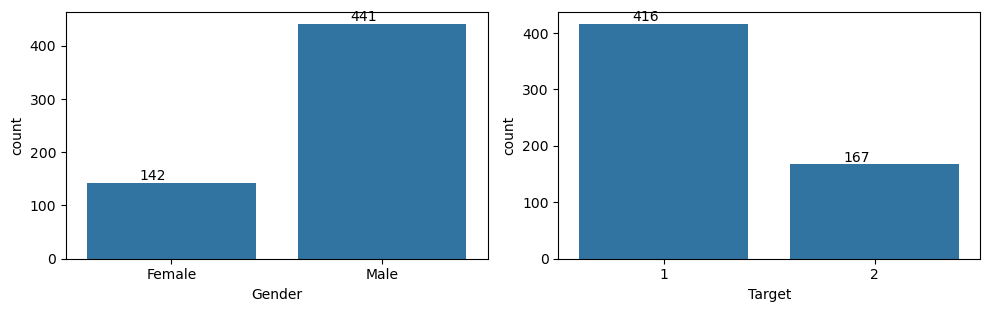

In [30]:
plt.figure(figsize=(10,15))
plotnumber = 1
for i in d1:
    plt.subplot(5,2,plotnumber)
    ax = sns.countplot(x = d1[i])
    plotnumber+=1
    for s in ax.patches:
        ax.annotate(int(s.get_height()),(s.get_x()+0.25,s.get_y()+s.get_height()), va = 'bottom')
plt.tight_layout()

### Insigths

* Males dominate the dataset with 441 counts, compared to 142 females.
* Target 1 is more frequent with 416 counts, while Target 2 has significantly fewer at 167.

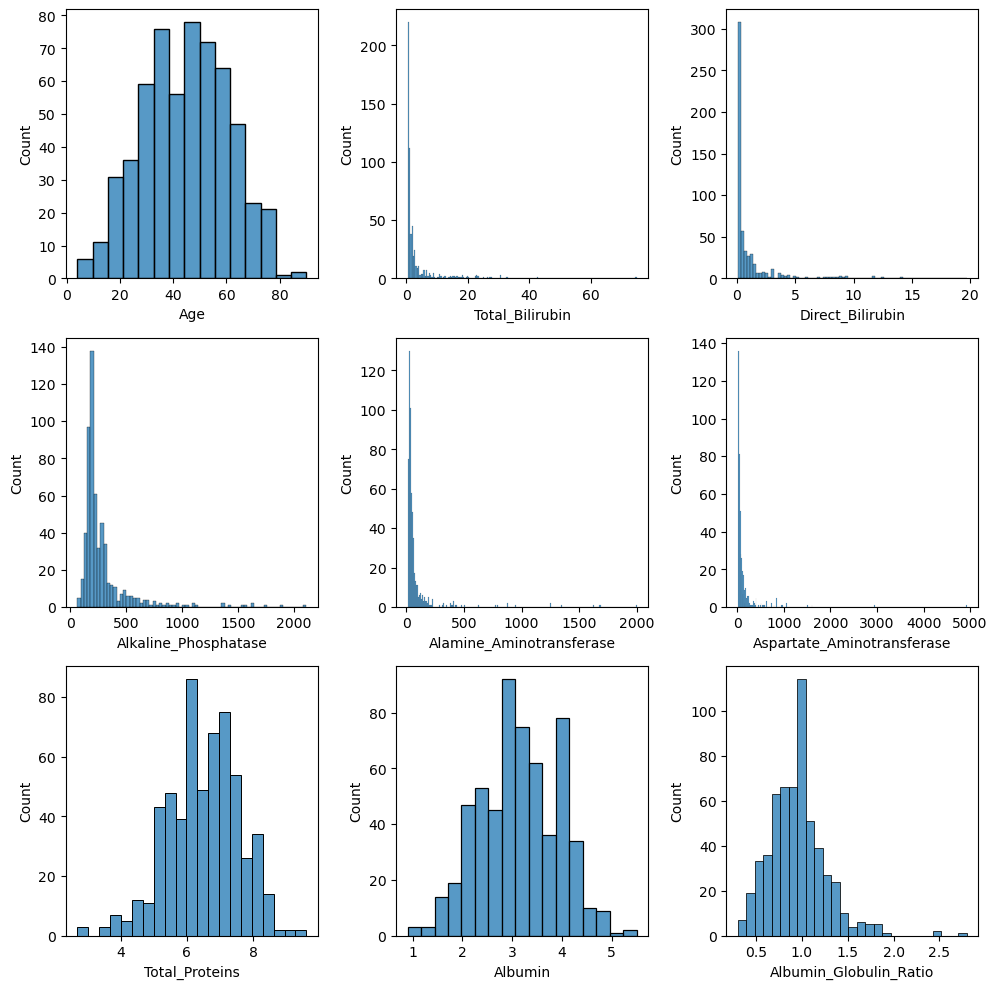

In [31]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x = d2[i])
    plotnumber+=1
plt.tight_layout()

### Insigths

* The distribution is roughly normal, with most individuals aged between 30 and 50 years.
* The data is heavily right-skewed, with most values concentrated near zero.
* Similar to Total Bilirubin, the distribution is right-skewed with most values near zero.
* Highly right-skewed, indicating most values are low but with a few extremely high outliers.
* Right-skewed, with a majority of low values and a few large outliers.
* Strongly right-skewed, with very few extreme high values.
* The distribution is symmetric, centered around 6-8 units.
* The data is slightly skewed, with most values concentrated around 3-5 units.
* The distribution is slightly skewed, with most values between 0.8 and 2.5.

## Bivariate Analysis

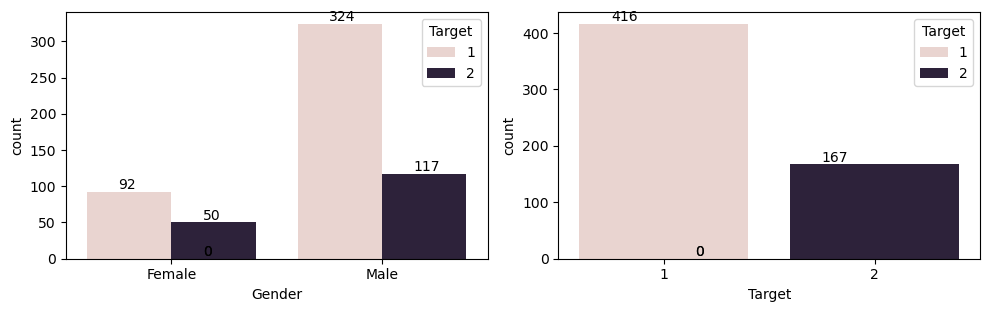

In [33]:
plt.figure(figsize=(10,15))
plotnumber = 1
for i in d1:
    plt.subplot(5,2,plotnumber)
    ax = sns.countplot(x = d1[i],hue=lpp.Target)
    plotnumber+=1
    for s in ax.patches:
        ax.annotate(int(s.get_height()),(s.get_x()+0.15,s.get_y()+s.get_height()), va = 'bottom')
plt.tight_layout()

### Insights  

* The number of **males with Target 1 is significantly higher than females**, and **no females have Target 2**.  
* **Target 1 is more prevalent (416 counts)**, while **Target 2 has only 167 counts** overall.  

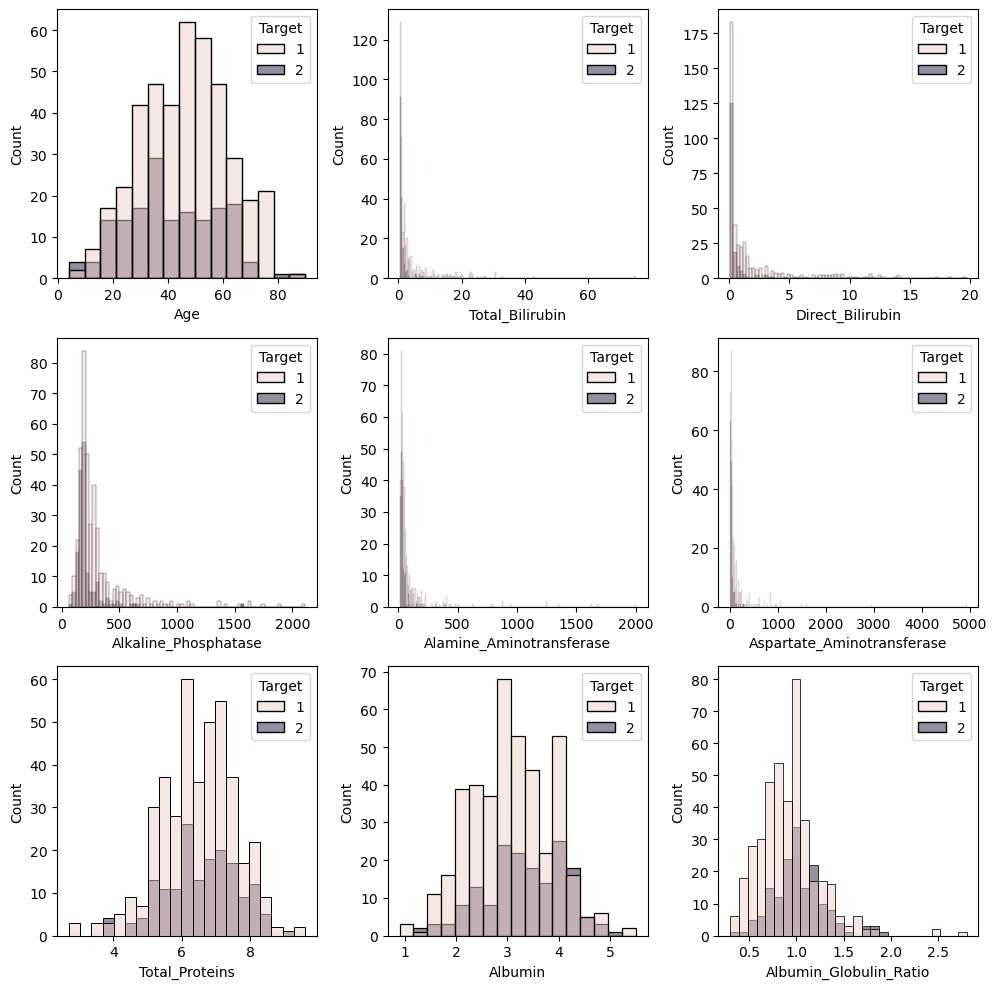

In [34]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x = d2[i],hue=lpp.Target)
    plotnumber+=1
plt.tight_layout()

### Insights  

* Both target groups have a similar **age distribution**, with a **peak between 30 and 50 years**.  
* **Target 2 has slightly higher values** compared to Target 1, indicating **more outliers**.  
* Similar to **Total Bilirubin**, **Target 2 shows slightly elevated values**.  
* Both groups show **right-skewed distributions**, but **Target 2 has more extreme high values**.  
* **Target 2 has a broader spread with higher outliers** compared to Target 1.  
* Similar to **Alanine Aminotransferase**, **Target 2 shows more high-value outliers**.  
* Both groups are **similarly distributed, centered around 6–8 units**.  
* **Target 2 appears to have slightly lower values** compared to Target 1.  
* **Target 2 shows a slightly lower ratio on average** than Target 1.  

# Data Preprocessing

### Handling with null Values

In [37]:
lpp["Albumin_Globulin_Ratio"]=lpp["Albumin_Globulin_Ratio"].fillna(lpp["Albumin_Globulin_Ratio"].mean())

In [38]:
lpp.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_Globulin_Ratio        0
Target                        0
dtype: int64

In [39]:
lpp.drop_duplicates(inplace=True)

In [40]:
lpp.duplicated().sum()

0

### Handling With Outlayers


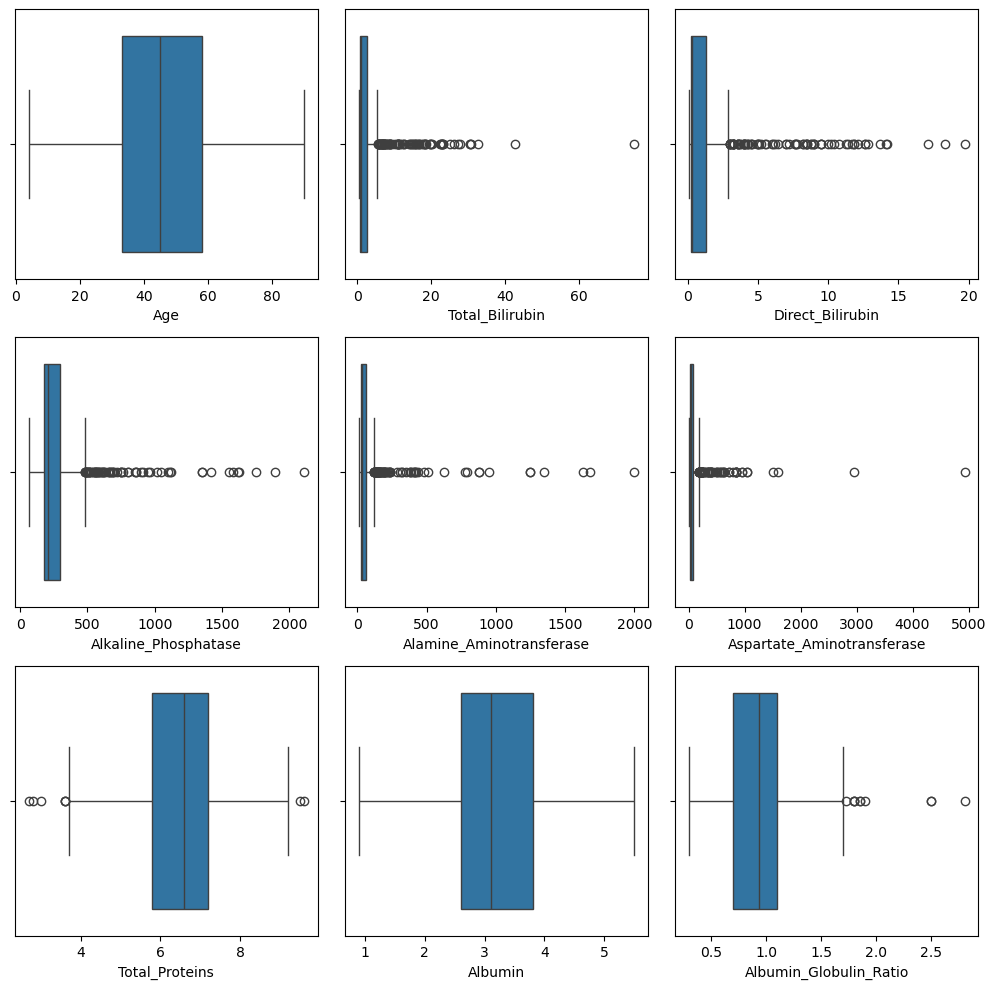

In [42]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x = d2[i])
    plotnumber+=1
plt.tight_layout()

### Total _Bilirubin

In [44]:
min_tb = np.mean(lpp.Total_Bilirubin) - 2.7*np.std(lpp.Total_Bilirubin)
min_tb

-13.586834384062755

In [45]:
max_tb = np.mean(lpp.Total_Bilirubin) + 2.7*np.std(lpp.Total_Bilirubin)
max_tb

20.23034315599258

In [46]:
lpp.loc[(lpp.Total_Bilirubin>max_tb)|(lpp.Total_Bilirubin<min_tb),
         'Total_Bilirubin'] = np.median(lpp.Total_Bilirubin)

<Axes: xlabel='Total_Bilirubin'>

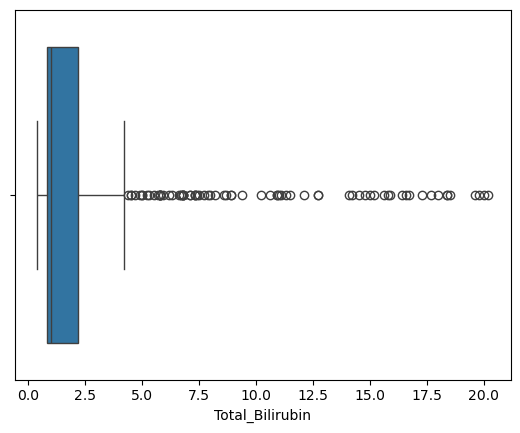

In [47]:
sns.boxplot(x = lpp.Total_Bilirubin)

In [48]:
numerical_columns = ['Direct_Bilirubin','Alkaline_Phosphatase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Proteins','Albumin_Globulin_Ratio']

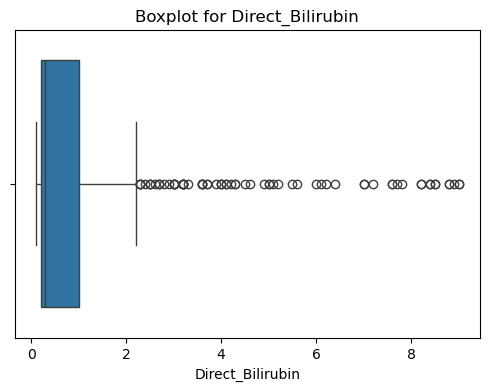

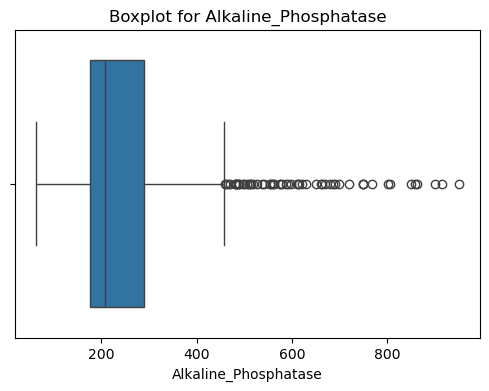

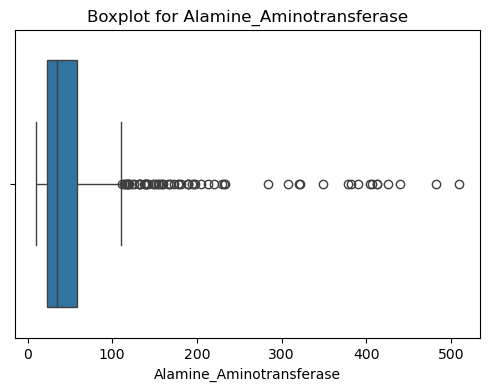

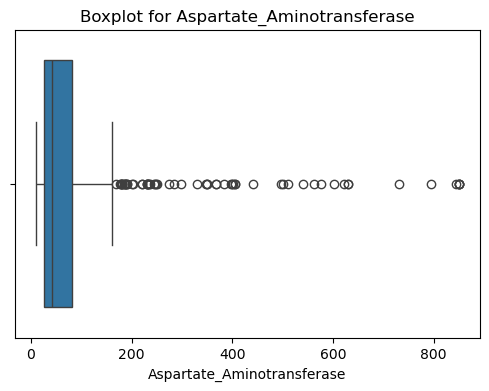

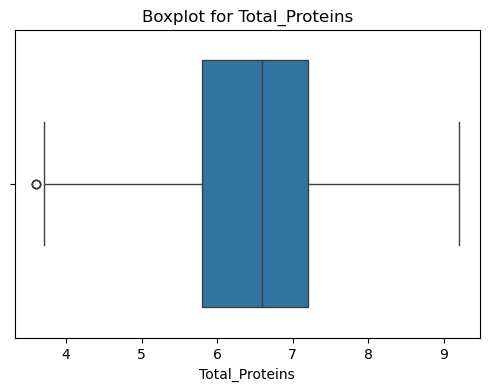

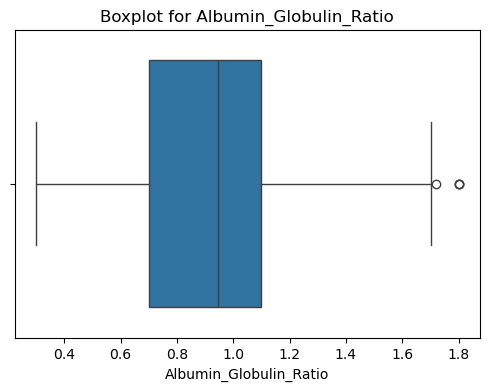

In [49]:
for col in numerical_columns:
    min_val = np.mean(lpp[col]) - 2.7 * np.std(lpp[col])
    max_val = np.mean(lpp[col]) + 2.7 * np.std(lpp[col])
    lpp.loc[(lpp[col] > max_val) | (lpp[col] < min_val), col] = np.median(lpp[col])
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=lpp[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

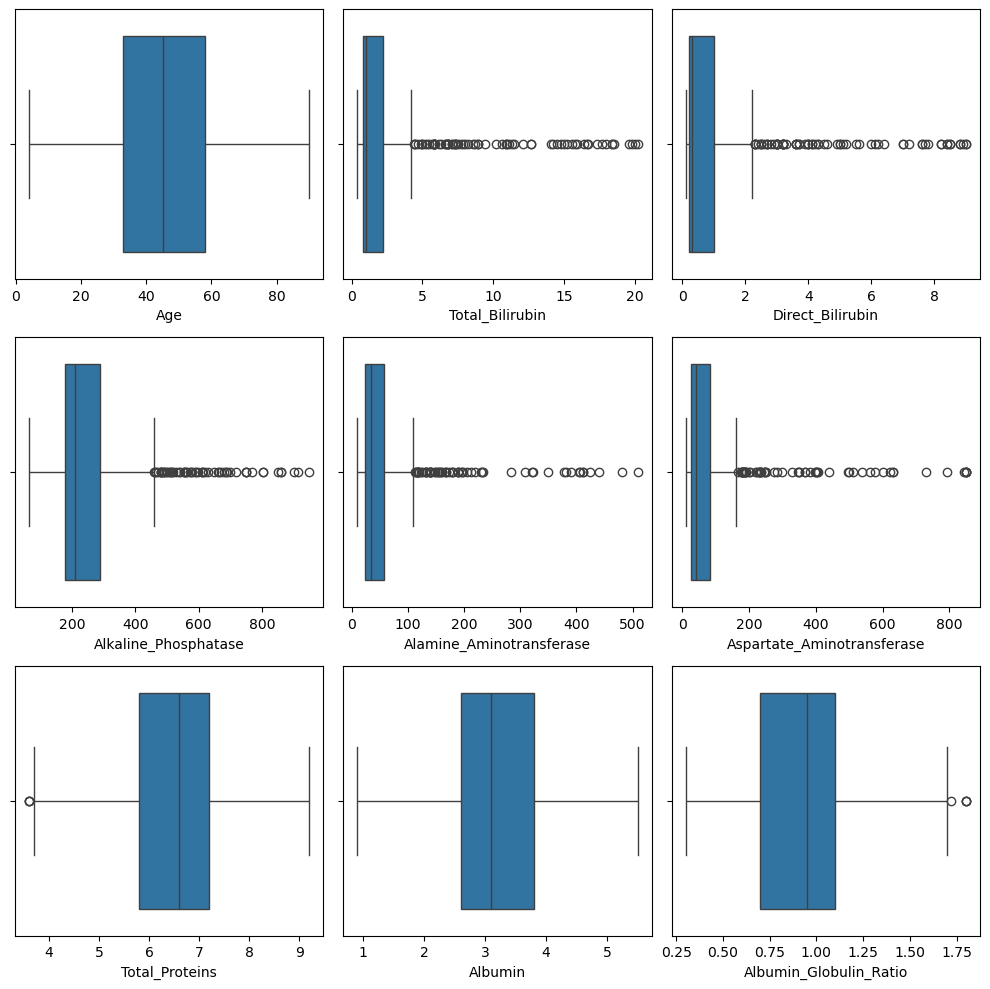

In [50]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in d2:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x = lpp[i])
    plotnumber+=1
plt.tight_layout()

## Convert Categerical data to Numerical data

In [52]:
lpp.describe(include='O')

,Gender
count,570
unique,2
top,Male
freq,430


In [53]:
lpp.Gender.value_counts()

Gender
Male      430
Female    140
Name: count, dtype: int64

In [54]:
#Transfrom Gender string into float values
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
lpp.loc[:,'Gender'] = le.transform(lpp['Gender'])


In [55]:
#Also transform Selector variable into usual conventions followed
lpp['Target'] = lpp['Target'].map({2:0, 1:1})

In [56]:
lpp.Target.value_counts()

Target
1    406
0    164
Name: count, dtype: int64

In [57]:
lpp['Gender']=lpp.Gender.astype(np.int64)

## Feature Selection

In [59]:
d2.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125
Alkaline_Phosphatase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040
Total_Proteins,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632
Albumin_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000


<Axes: >

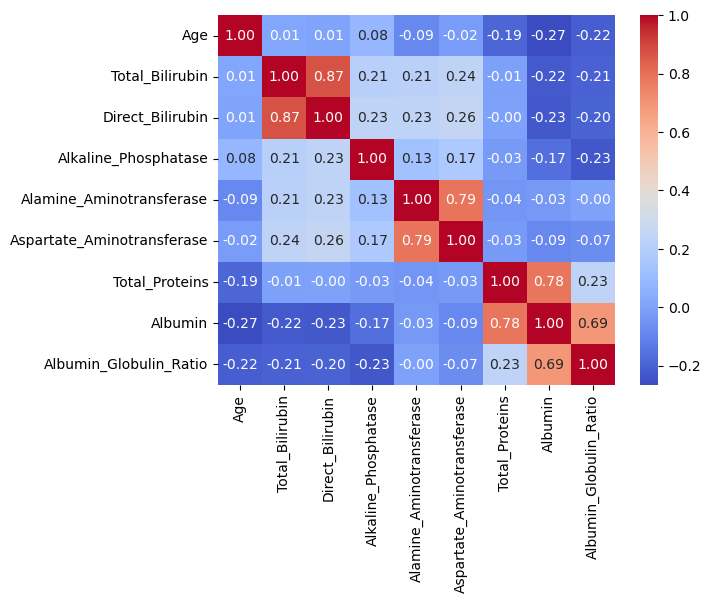

In [60]:
sns.heatmap(d2.corr(),annot=True,annot_kws={"size":10},cmap="coolwarm",fmt='.2f')

# Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
lpp_sc = scaler.fit_transform(lpp.drop(['Target'],axis=1))
lpp_sc = pd.DataFrame(lpp_sc,columns=lpp.columns[:-1])

# Model Creation

In [66]:
x = lpp_sc
y = lpp.Target

In [67]:
print(x.shape)
print(y.shape)

(570, 10)
(570,)


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [70]:
y_train.value_counts()

Target
1    303
0    124
Name: count, dtype: int64

In [71]:
y_test.value_counts

<bound method IndexOpsMixin.value_counts of 520    1
75     0
139    1
413    0
554    1
      ..
94     1
425    1
193    0
18     1
276    0
Name: Target, Length: 143, dtype: int64>

# Balancing

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
sm = SMOTE()

In [75]:
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [76]:
y_sm.value_counts()

Target
1    303
0    303
Name: count, dtype: int64

## Logistic Regression

In [78]:
lr = LogisticRegression()

In [191]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(x_sm, y_sm)

LogisticRegression(max_iter=1000, random_state=42)

In [193]:
y_predit_lr = lr.predict(x_test)
y_predit_lr

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [195]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_lr),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_lr))

Test Score

accuracy_score 0.6363636363636364 

classification_report
               precision    recall  f1-score   support

           0       0.42      0.78      0.54        40
           1       0.87      0.58      0.70       103

    accuracy                           0.64       143
   macro avg       0.64      0.68      0.62       143
weighted avg       0.74      0.64      0.65       143



In [197]:
y_predit_lr_train = lr.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_lr_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_lr_train))

Train Score

accuracy_score 0.6604215456674473 

classification_report
               precision    recall  f1-score   support

           0       0.45      0.83      0.59       124
           1       0.90      0.59      0.71       303

    accuracy                           0.66       427
   macro avg       0.67      0.71      0.65       427
weighted avg       0.77      0.66      0.68       427



## SVM

In [84]:
svm = SVC()

In [199]:
svm.fit(x_sm,y_sm)

SVC()

In [201]:
y_predit_svm = svm.predict(x_test)
y_predit_svm

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [203]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_svm),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_svm))

Test Score

accuracy_score 0.6153846153846154 

classification_report
               precision    recall  f1-score   support

           0       0.41      0.80      0.54        40
           1       0.88      0.54      0.67       103

    accuracy                           0.62       143
   macro avg       0.64      0.67      0.60       143
weighted avg       0.74      0.62      0.63       143



In [205]:
y_predit_svm_train = svm.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_svm_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_svm_train))

Train Score

accuracy_score 0.6744730679156908 

classification_report
               precision    recall  f1-score   support

           0       0.47      0.87      0.61       124
           1       0.92      0.59      0.72       303

    accuracy                           0.67       427
   macro avg       0.69      0.73      0.66       427
weighted avg       0.79      0.67      0.69       427



### KNN

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)

In [91]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
y_predit_knn = knn.predict(x_test)
y_predit_knn

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [93]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_knn),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_knn))


Test Score

accuracy_score 0.6923076923076923 

classification_report
               precision    recall  f1-score   support

           0       0.45      0.42      0.44        40
           1       0.78      0.80      0.79       103

    accuracy                           0.69       143
   macro avg       0.61      0.61      0.61       143
weighted avg       0.69      0.69      0.69       143



In [94]:
y_predit_knn_train = knn.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_knn_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_knn_train))

Train Score

accuracy_score 0.8548009367681498 

classification_report
               precision    recall  f1-score   support

           0       0.79      0.69      0.73       124
           1       0.88      0.92      0.90       303

    accuracy                           0.85       427
   macro avg       0.83      0.80      0.82       427
weighted avg       0.85      0.85      0.85       427



## Decision Tree

In [101]:
from sklearn.model_selection import GridSearchCV
param_grid =  {
    "criterion":("gini","entropy"),
    "splitter":("best","random"),
    "max_depth":(list(range(1,10))),
    "min_samples_split":[2,3,4,5,6,7],
    "min_samples_leaf":list(range(1,15))
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_sm,y_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ('best', 'random')},
             scoring='accuracy')

In [102]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}


In [103]:
dt = DecisionTreeClassifier(**best_params, random_state=42)
dt.fit(x_sm,y_sm)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=7, random_state=42,
                       splitter='random')

In [104]:
y_predit_dt = dt.predict(x_test)
y_predit_dt

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [105]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_dt),'\n')
print('classification_report\n',classification_report(y_test,y_predit_dt))

Test Score

accuracy_score 0.5944055944055944 

classification_report
               precision    recall  f1-score   support

           0       0.36      0.57      0.44        40
           1       0.78      0.60      0.68       103

    accuracy                           0.59       143
   macro avg       0.57      0.59      0.56       143
weighted avg       0.67      0.59      0.61       143



In [106]:
y_predit_dt_train = dt.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_dt_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_dt_train))

Train Score

accuracy_score 0.7002341920374707 

classification_report
               precision    recall  f1-score   support

           0       0.49      0.77      0.60       124
           1       0.88      0.67      0.76       303

    accuracy                           0.70       427
   macro avg       0.68      0.72      0.68       427
weighted avg       0.76      0.70      0.71       427



## Bagging using Decision Tree

In [108]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [109]:
model_bagg = BaggingClassifier(estimator=dt, n_estimators=100,random_state=15)
model_bagg.fit(x_sm, y_sm)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                   min_samples_leaf=7,
                                                   random_state=42,
                                                   splitter='random'),
                  n_estimators=100, random_state=15)

In [110]:
y_predit_bagg = model_bagg.predict(x_test)

In [111]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_bagg),'\n')
print('classification_report\n',classification_report(y_test,y_predit_bagg))

Test Score

accuracy_score 0.6713286713286714 

classification_report
               precision    recall  f1-score   support

           0       0.44      0.70      0.54        40
           1       0.85      0.66      0.74       103

    accuracy                           0.67       143
   macro avg       0.65      0.68      0.64       143
weighted avg       0.74      0.67      0.69       143



In [112]:
y_predit_bagg_train = dt.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_bagg_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_bagg_train))

Train Score

accuracy_score 0.7002341920374707 

classification_report
               precision    recall  f1-score   support

           0       0.49      0.77      0.60       124
           1       0.88      0.67      0.76       303

    accuracy                           0.70       427
   macro avg       0.68      0.72      0.68       427
weighted avg       0.76      0.70      0.71       427



## Random Forest

In [114]:
rf = RandomForestClassifier(n_estimators=200,random_state=52)
rf.fit(x_sm, y_sm)

RandomForestClassifier(n_estimators=200, random_state=52)

In [115]:
y_predit_rf = rf.predict(x_test)
y_predit_rf

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [116]:
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf))

Test Score

accuracy_score 0.7272727272727273 

classification_report
               precision    recall  f1-score   support

           0       0.51      0.55      0.53        40
           1       0.82      0.80      0.81       103

    accuracy                           0.73       143
   macro avg       0.67      0.67      0.67       143
weighted avg       0.73      0.73      0.73       143



In [117]:
y_predit_rf_train = rf.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_rf_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_rf_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       303

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



## Hyperparameter Tuning using Random Forest

In [119]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [120]:
grid_search = RandomizedSearchCV(rf, random_grid, cv=5, scoring='accuracy',random_state=23)

In [121]:
grid_search.fit(x_sm, y_sm)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=200,
                                                    random_state=52),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=23, scoring='accuracy')

In [122]:
grid_search.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [123]:
rf_hyp = RandomForestClassifier(n_estimators= 1200,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 20,
 bootstrap= False)

In [124]:
rf_hyp.fit(x_sm, y_sm)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=1200)

In [125]:
y_predit_rf_hyp = rf_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_rf_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_rf_hyp))

Test Score

accuracy_score 0.7062937062937062 

classification_report
               precision    recall  f1-score   support

           0       0.47      0.42      0.45        40
           1       0.79      0.82      0.80       103

    accuracy                           0.71       143
   macro avg       0.63      0.62      0.62       143
weighted avg       0.70      0.71      0.70       143



In [126]:
rf_hyp_train = rf_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,rf_hyp_train),'\n')
print('classification_report\n',classification_report(y_train,rf_hyp_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       303

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



## Gradient Boosting

In [128]:
gb = GradientBoostingClassifier()

In [129]:
gb.fit(x_sm, y_sm)

GradientBoostingClassifier()

In [130]:
y_predit_gb = gb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_gb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_gb))

Test Score

accuracy_score 0.6433566433566433 

classification_report
               precision    recall  f1-score   support

           0       0.38      0.42      0.40        40
           1       0.77      0.73      0.75       103

    accuracy                           0.64       143
   macro avg       0.57      0.58      0.57       143
weighted avg       0.66      0.64      0.65       143



In [131]:
y_predit_gb_train = gb.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,y_predit_gb_train),'\n')
print('classification_report\n',classification_report(y_train,y_predit_gb_train))

Train Score

accuracy_score 0.9133489461358314 

classification_report
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       124
           1       0.97      0.90      0.94       303

    accuracy                           0.91       427
   macro avg       0.89      0.92      0.90       427
weighted avg       0.92      0.91      0.92       427



## XGBoost

In [133]:
xgb = XGBClassifier()

In [134]:
xgb.fit(x_sm, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [135]:
y_predit_xgb = xgb.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.6783216783216783 

classification_report
               precision    recall  f1-score   support

           0       0.42      0.42      0.42        40
           1       0.78      0.78      0.78       103

    accuracy                           0.68       143
   macro avg       0.60      0.60      0.60       143
weighted avg       0.68      0.68      0.68       143



In [136]:
xgb_train = xgb.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,xgb_train),'\n')
print('classification_report\n',classification_report(y_train,xgb_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       303

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



## Hyperparameter Tuning XGBoost

In [138]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [139]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

In [140]:
random_search.fit(x_sm, y_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [141]:
random_search.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.9}

In [142]:
xgb_hyp = XGBClassifier(subsample = 0.9,
  n_estimators = 300,
  min_child_weight = 1,
  max_depth = 6,
  learning_rate = 0.2,
  gamma = 0,
  colsample_bytree = 1.0)

In [143]:
xgb_hyp.fit(x_sm, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [144]:
y_predit_xgb_hyp = xgb_hyp.predict(x_test)
print('Test Score\n')
print('accuracy_score',accuracy_score(y_test,y_predit_xgb_hyp),'\n')
print('classification_report\n',
      classification_report(y_test,y_predit_xgb))

Test Score

accuracy_score 0.6993006993006993 

classification_report
               precision    recall  f1-score   support

           0       0.42      0.42      0.42        40
           1       0.78      0.78      0.78       103

    accuracy                           0.68       143
   macro avg       0.60      0.60      0.60       143
weighted avg       0.68      0.68      0.68       143



In [145]:
xgb_train = xgb_hyp.predict(x_train)
print('Train Score\n')
print('accuracy_score',accuracy_score(y_train,xgb_train),'\n')
print('classification_report\n',classification_report(y_train,xgb_train))

Train Score

accuracy_score 1.0 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       303

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



# Conclusions

In [209]:
models=['LogisticRegression','KNN','SVM','Decision Tree','Random Forest','Bagging','xgboost']
accuracy_scores=[ accuracy_score(y_test,y_predit_lr),accuracy_score(y_test,y_predit_knn),accuracy_score(y_test,y_predit_svm),accuracy_score(y_test,y_predit_dt),accuracy_score(y_test,y_predit_rf_hyp),accuracy_score(y_test,y_predit_bagg),accuracy_score(y_test,y_predit_xgb_hyp)]

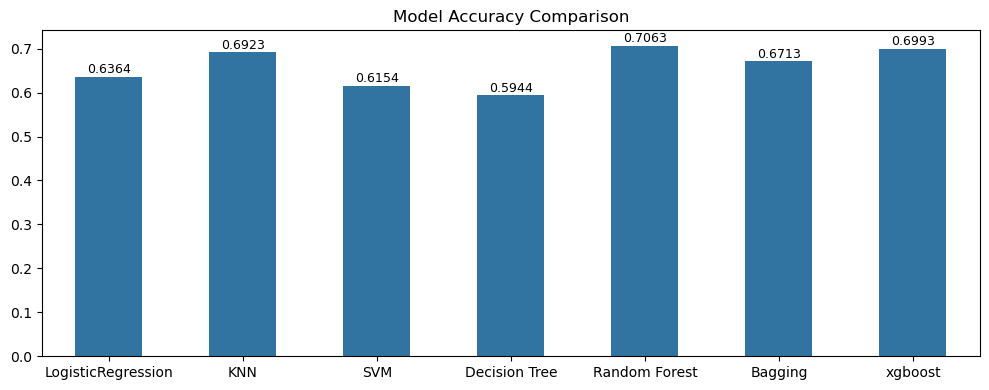

In [211]:
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x=models, y=accuracy_scores,width=0.5)
plt.title('Model Accuracy Comparison')

# Add labels to the top of each bar
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Model Comparison Report
The graph highlights the performance of various machine learning models based on their accuracy scores. Among these, the Random Forest model achieved the highest accuracy at approximately 70% (0.7063), making it the most suitable choice for deployment in production. Hence, the Random Forest model is selected as the predictive approach for liver patient prediction.

## Report on Challenges faced

#### 1. Missing Data
##### Problem: 
Some columns had missing values.
##### Solution: 
##### Filled missing values using:
Average or Median for numbers.
Most common value for categories.
##### Why: 
To keep the dataset complete without distorting the data.

#### 2. Imbalanced Data
##### Problem: 
Target 1 had many more examples than Target 2.
##### Solution: 
Used SMOTE to create more samples for Target 2.
##### Why: 
To balance the classes so the model learns both equally well.

#### 3. Outliers
##### Problem: 
Some values were extremely high and could affect model accuracy.
##### Solution: 
Capped extreme values: Used a method to limit values that were too high or too low by calculating a range based on the mean and standard deviation, and replacing outliers with the median.
###### Boxplots: 
Visualized the data for each column to identify and verify outliers.
##### Why: 
Capping outliers ensures they don’t dominate the model, while using the median keeps the data consistent without losing important patterns.

#### 4. Feature Scaling
##### Problem: 
Some features dominating the model due to their larger numerical values.
##### Solution: 
We used standardization to scale all features to the same range.
##### Why: 
Standardizing ensures all features have equal importance in the model.


## Model Design Analysis

#### 1. Understanding the Problem
The goal is to predict liver disease using various patient features, handling challenges like missing data and class imbalance.

#### 2. Data Preprocessing
##### a. Missing Data
Filled missing values using averages (numerical) and the most common value (categorical) to maintain dataset completeness.

##### b. Outliers
Replaced extreme values with the median to reduce their impact on model performance.

##### c. Skewed Data
Applied log transformation to balance the distribution and reduce the effect of extreme values.

##### d. Different Feature Scales
Standardized features to the same range to ensure equal importance of all features.

#### 3. Choosing the Best Model
##### a. Testing Different Models
Tested models like Logistic Regression, SVM, and Random Forest, selecting Random Forest for its best performance (~70% accuracy).

##### b. Handling Imbalanced Data
Used SMOTE to create synthetic samples for Target 2, balancing the dataset for better model learning.

#### 4. Improving the Model
##### a. Hyperparameter Tuning
Used Grid Search to optimize the Random Forest model settings for improved accuracy.

##### b. Cross-Validation
Used 10-fold cross-validation to ensure the model generalizes well and isn’t overfitting.

#### 5. Evaluating the Model
Used accuracy, precision, recall, and F1-score to evaluate the model’s performance comprehensively.

#### 6. Conclusion
Random Forest is the best model for predicting liver disease after addressing data challenges through preprocessing techniques.